# Introduction 
For assignment 1 present on Canvas, I am going to explore data from activity trackers. 
Activity trackers are applications that track your activity using your smartphone, a smartwatch, wrist band or a clip-on device. Popular applications include Steps (iPhone), Apple Watch, Fitbit and Jawbone. For a study in France (Hermsen et al., 2017), over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.


Reference:
- Hermsen, S., Moons, J., Kerkhof, P., Wiekens, C., & de Groot, M. (2017). Determinants for Sustained Use of an Activity Tracker: Observational Study. JMIR MHealth and UHealth, 5(10), e164. https://doi.org/10.2196/mhealth.7311

In [1]:
# Import datasets as dataframes on Jupiter

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df_survey = pd.read_csv("survey.csv")
df_steps= pd.read_csv("steps.csv", sep=';')

### Merge the two dataframes together and find the mean of steps per participant

In [2]:
df_merged= df_survey.merge(df_steps, on="id")
print(df_merged)

      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school   

     height  weight  20-6-2

In [3]:
df_merged.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,465.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,697.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


The weight values are strange, therefore I decided to used a boxplot visualization to visualize better the data and then remove all the NaN values.

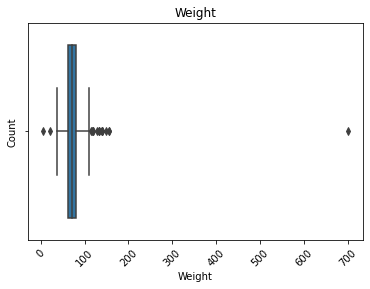

In [8]:
sns.boxplot(x="weight", data=df_merged)
plt.title("Weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Create the variable mean steps per participant

In [5]:
df_merged['df_steps'] = df_merged.loc[:,"20-6-2013" : "13-5-2014"].mean(axis=1)

#Show the head() of the resulting data frame
df_merged['df_steps'].head()

0    10205.521212
1     5687.423313
2     8301.729730
3     3633.200000
4     5312.129630
Name: df_steps, dtype: float64

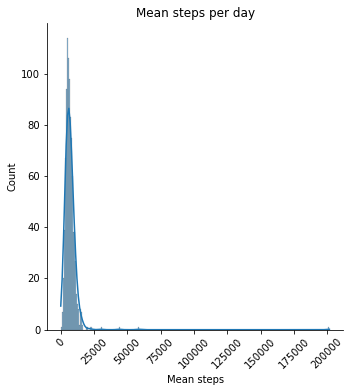

In [6]:
# Graph of distribution - Histogram 

sns.displot(df_merged['df_steps'].dropna(), kde= True)
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

To analyse if there are outliers and fully comprehend the distribution graph, I decided to create a boxplot graph. 

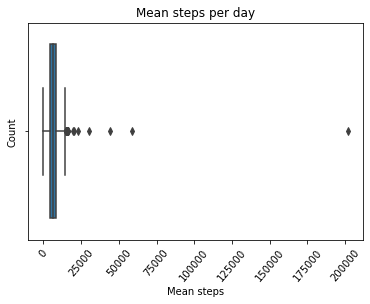

In [10]:
sns.boxplot(x="df_steps", data=df_merged)
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=50)
plt.show()

### Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)

In [28]:
df_merged['df_steps'].describe()

count       925.000000
mean       7036.627485
std        7396.879008
min           4.000000
25%        4636.000000
50%        6245.006061
75%        8399.670213
max      201722.600000
Name: df_steps, dtype: float64

### Results:
The distribution graph in form of a histogram has right-skewed distribution. From the boxplot graph, it is possible to notice that there some outliers data points such as 50,0000 and 200,000 steps on avarage per day. This seems to be impossible for an avarage person. The outliners have influenced the statistics results. Therefore, I determined to filter out steps above 100,000.  


In [11]:
df = df_merged[df_merged['df_steps']<100000]

In [20]:
print('Median = '+str(df['df_steps'].median()))
print('Mean = '+str(df['df_steps'].mean()))
print('St Dev. = '+str(df['df_steps'].std()))
print(df)

Median = 6244.931601731601
Mean = 6825.928380530858
St Dev. = 3696.491961554726
      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male

In [33]:
df_merged.count()

id           929
city         929
gender       929
age          929
hh_size      929
            ... 
10-5-2014     86
11-5-2014     81
12-5-2014     66
13-5-2014      0
df_steps     925
Length: 338, dtype: int64

### The relation of mean steps per participant with two categorical variables (e.g. gender, age, education) 

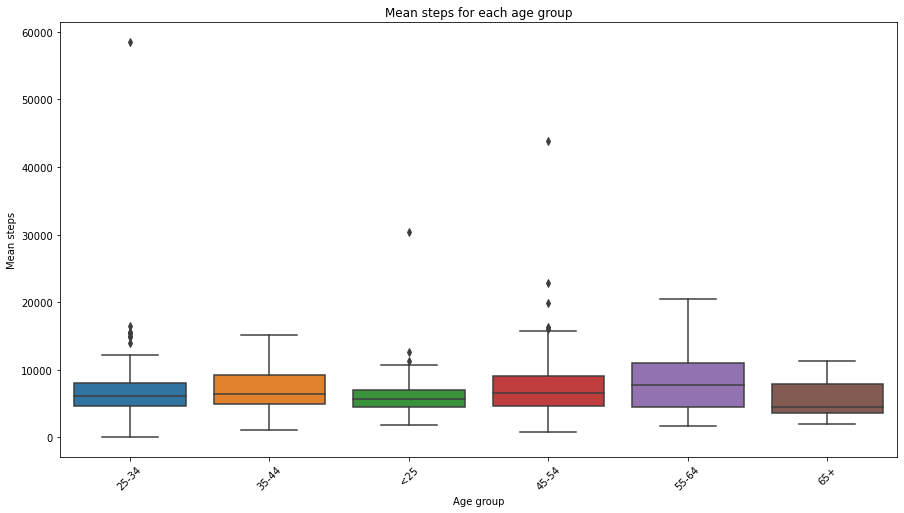

In [19]:
#Graph of the relation

plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.boxplot(x='age',y='df_steps',data=df)
plt.title('Mean steps for each age group')
plt.xlabel('Age group')
plt.ylabel('Mean steps')
plt.show()

### Describe and interpret the results

From the boxplot graph called 'Mean steps for each age group', we can observe that the group which walks the most is made of people aged between 55-64 years old. While, on the other hand, the group which seems to walk the least is the one with people younger than 25 years old.


In [43]:
df.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,df_steps
count,924.000000,924.000000,924.000000,923.000000,922.000000,23.000000,243.000000,278.000000,296.000000,354.000000,...,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0,924.000000
mean,465.149351,2.337662,2.527056,171.690141,72.831887,3537.304348,9034.724280,10889.636691,7402.847973,8110.370056,...,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN,6825.928381
std,268.406686,1.223041,1.274095,9.091925,25.953373,4006.278430,6412.774483,6283.204309,6733.291773,5495.536639,...,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN,3696.491962
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN,4.000000
25%,232.750000,1.000000,1.000000,165.000000,61.000000,299.000000,4395.500000,6524.250000,2726.750000,4428.250000,...,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN,4635.593137
50%,464.500000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN,6244.931602
75%,697.250000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN,8366.832967
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN,58491.067568


### Make a scatterplot matrix of the numerical variables

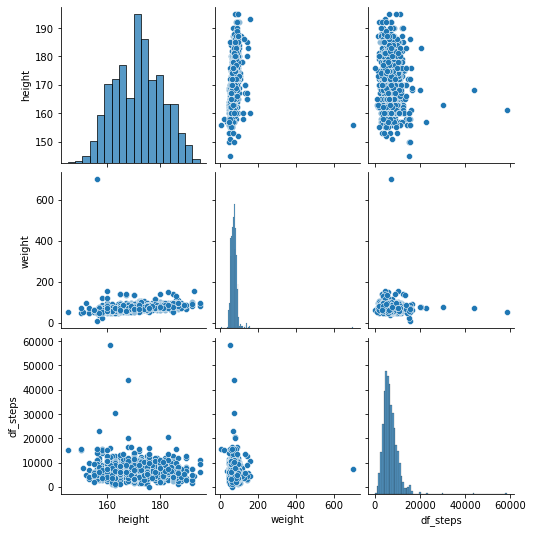

In [24]:
df_sel = df[['height', 'weight', 'df_steps']] #a subset with some variables
sns.pairplot(df_sel)
plt.show()

It is quite strange the results displayed from that the weight vs no. of steps graph. x= df_steps (no. of steps), y=weight. there are some outliers Some results indicate that people have a weigh close to 0.

Therefore, I decided to analyse/see how y=weight used as predictive variables behaves when being correlated to height and avarage no. of steps. 

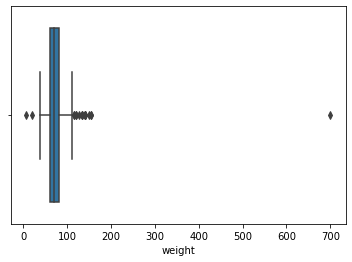

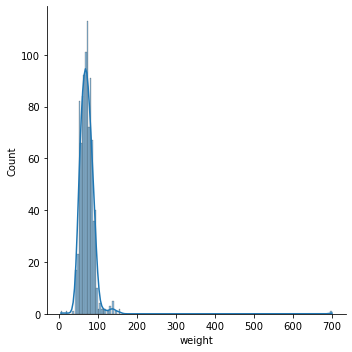

In [33]:
#boxplot & histogram graphs for the variable weight.

sns.boxplot(x='weight', data=df)
plt.show()
sns.displot(x='weight',kde=True, data=df)
plt.show()

# Results
As per the histogram, in the study conducted there have been people with a weight equal to 0. Moreover, it seems unusual to see that someone who weigh 700kg can walk around 10,000 steps per day. Both results interpreted from the histogram demonstrate that there are some irregularities/errors in the dataframe. 

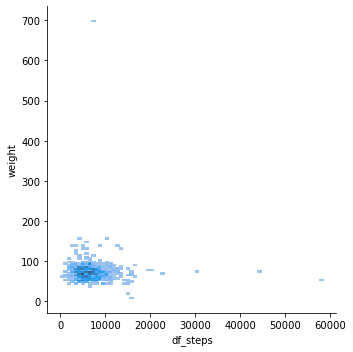

In [35]:
sns.displot(x= 'df_steps',y='weight', data=df)
plt.show()

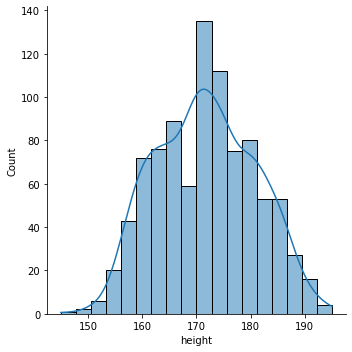

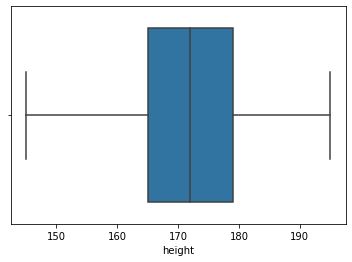

In [36]:
#plot the height to see outliners

sns.displot(x='height',kde=True, data=df)
plt.show()
sns.boxplot(x='height', data=df)
plt.show()

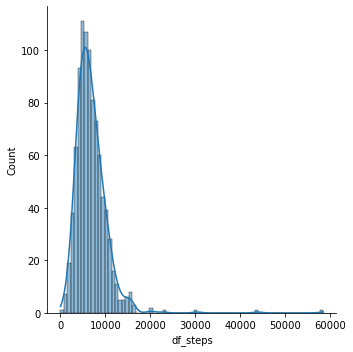

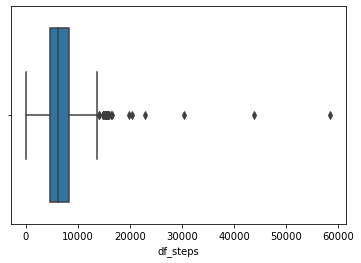

In [37]:
#plot avarage no.of steps per day

sns.displot(x='df_steps',kde=True, data=df)
plt.show()
sns.boxplot(x='df_steps', data=df)
plt.show()

strange. the outliers data points starts to have less variance when the the avarage no.of steps daily equals to 20,000. It is difficult to have people walking more than 20,000 steps per day on avarage. 

### Filter out the df dataframe based on the outliners on the code

In [63]:
df_outliers= df[(df['weight'] < 150)].sort_values(by='weight',ascending=False)
df_outliers.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,df_steps
257,258,Lille,Male,25-34,4,4,Bachelor,183.0,149.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5625.512821
25,26,Lille,Male,35-44,4,4,High school,185.0,140.0,164.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12565.815789
390,391,Bordeaux,Male,35-44,2,2,High school,165.0,140.0,NaN,...,2082.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3157.818182
583,584,Lille,Male,25-34,2,2,High school,180.0,140.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4636.000000
890,891,Bordeaux,Female,45-54,1,1,Bachelor,167.0,140.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8964.023256


In [65]:
df_outliers= df[(df['df_steps'] < 20000)].sort_values(by='df_steps',ascending=False)
df_outliers.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,df_steps
851,852,Lyon,Female,45-54,4,4,High school,168.0,78.0,298.0,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19893.464706
656,657,Montpellier,Male,25-34,1,1,Bachelor,169.0,63.0,2898.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16487.871166
302,303,Bordeaux,Female,45-54,5,4,Master or doctorate,168.0,90.0,298.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16378.346154
534,535,Lille,Male,45-54,3,4,Master or doctorate,176.0,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16026.470238
481,482,Lille,Female,55-64,2,2,High school,161.0,69.0,NaN,...,5543.0,15080.0,16172.0,5690.0,22578.0,18562.0,11535.0,NaN,NaN,15796.350554


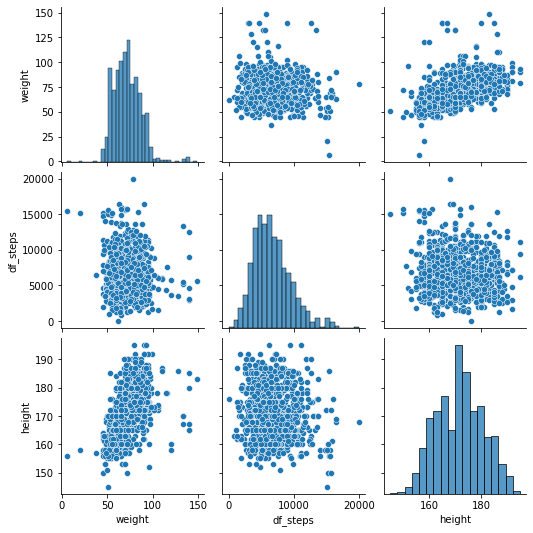

In [66]:
df = df[(df['weight'] < 150) & (df['df_steps'] < 20000)] #we want to subset the original dataset, otherwise we lose data
df_sel = df[['weight', 'df_steps', 'height']]

sns.pairplot(df_sel)
plt.show()

### Make a correlation matrix of the numerical variables

In [67]:
corr = df_sel[['weight', 'df_steps', 'height']].corr()
corr

,weight,df_steps,height
weight,1.000000,-0.094499,0.527297
df_steps,-0.094499,1.000000,-0.082121
height,0.527297,-0.082121,1.000000


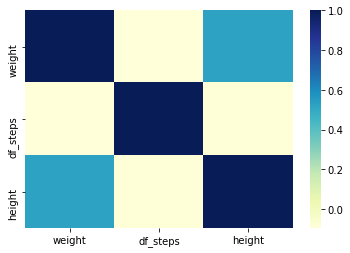

In [68]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")
plt.show()

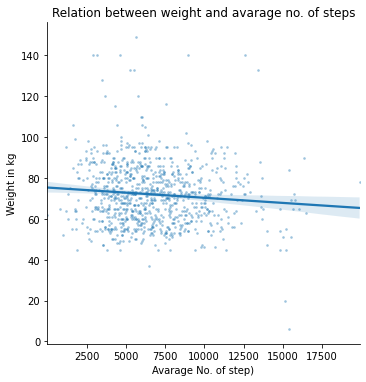

In [71]:
# shows the datapoints and a regression line.

sns.lmplot(x='df_steps', y='weight', scatter_kws={'s':3,'alpha':0.3}, data=df) 
plt.xlabel('Avarage No. of step)') 
plt.ylabel('Weight in kg')
plt.title('Relation between weight and avarage no. of steps')
plt.show()

#### Significance of the correlation

In [70]:
#Import scipy package to run the correlation fuction

from scipy.stats.stats import pearsonr 
print(pearsonr(df_sel['df_steps'],df_sel['weight']))

(-0.09449883453196997, 0.0042441510681727815)


### Results
Pearsons correlation test indicates that there is no relationship between the avarage number of steps and the weight of the participants to the study. 


# Predictive model

### Explain linear regression in your own words

From what i grasped from the lectures, I would explain linear regression as an approach/technique to find out if the prediction model that we want to create/analyse has a relationship between one or more predictor variable(s). For this assignment, linear regression can help to visualize/analyse if there is a relation/correlation between the no. of steps that people take daily and their height and/or weight. 


In [73]:
print(df)

      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school   

     height  weight  20-6-2

### Create dummy variables for the categorical variables

In [72]:
df['education_1'].value_counts()

Master or doctorate    404
Bachelor               351
High school            105
Vocational              40
Primary                 13
No degree                1
Name: education_1, dtype: int64

In [80]:
df1= pd.get_dummies(df, columns =['education_1', 'age'], drop_first=True)
df1.head()

,id,city,gender,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,...,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,age_35-44,age_45-54,age_55-64,age_65+,age_<25
0,1,Bordeaux,Male,4,4,178.0,98.0,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,2,Lille,Male,1,3,180.0,77.0,NaN,NaN,10473.0,...,0,0,0,0,0,1,0,0,0,0
2,3,Montpellier,Male,2,2,180.0,83.0,NaN,11428.0,12523.0,...,0,1,0,0,0,0,0,0,0,0
3,4,Lyon,Male,1,1,178.0,80.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,5,Montpellier,Female,3,4,167.0,61.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


### Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).

In [89]:
df1.dropna(how='all')

#df1.dropna(subset = ["weight", 'height'], inplace=True)


,id,city,gender,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,...,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,age_35-44,age_45-54,age_55-64,age_65+,age_<25
0,1,Bordeaux,Male,4,4,178.0,98.0,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,2,Lille,Male,1,3,180.0,77.0,NaN,NaN,10473.0,...,0,0,0,0,0,1,0,0,0,0
2,3,Montpellier,Male,2,2,180.0,83.0,NaN,11428.0,12523.0,...,0,1,0,0,0,0,0,0,0,0
3,4,Lyon,Male,1,1,178.0,80.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,5,Montpellier,Female,3,4,167.0,61.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,3,4,165.0,59.0,NaN,4571.0,10471.0,...,0,1,0,0,0,0,1,0,0,0
925,926,Lille,Male,3,5,192.0,90.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
926,927,Montpellier,Male,2,2,181.0,71.0,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
927,928,Lille,Female,1,1,172.0,65.0,NaN,NaN,14411.0,...,1,0,0,0,0,0,0,1,0,0


In [90]:
from sklearn.model_selection import train_test_split

x = df1[['weight', 'height']] #we need to create lists of the two variables
y = df1['df_steps']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=23)

In [91]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() #this creates a new LR model
lm= lm.fit(x_train, y_train)

In [101]:
y_test_p =lm.predict(x_test)

# Calculate the R^2 and RMSE, *using the test data*
from sklearn.metrics import r2_score
r2_score(y_test, y_test_p)

0.012062124119023077

In [97]:
import math
from sklearn.metrics import mean_squared_error


math.sqrt(mean_squared_error(y_test, y_test_p))

3000.1974401484654

### Results interpretation 

0.12% of the outcome can be explained by the model. Therefore, it is possible to deduct that it is not the ideal model that can be used to predict the mean steps per participants.